# Remote_sensing HW2

一、匯入所需要的模組

In [3]:
import os
from glob import glob  # File manipulation
import numpy as np
import geopandas as gpd
import rasterio as rio
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
%matplotlib inline

二、設定好檔案路徑並進行排序

In [4]:
path = os.path.join("/Users/liuzhengying/EO1H1170422007342110KV/")
all_EO1_post_bands = glob(os.path.join(path, "*B*.TIF"))
all_EO1_post_bands.sort()

In [5]:
all_EO1_post_bands

['/Users/liuzhengying/EO1H1170422007342110KV/EO1H1170422007342110KV_B001_L1GST.TIF',
 '/Users/liuzhengying/EO1H1170422007342110KV/EO1H1170422007342110KV_B002_L1GST.TIF',
 '/Users/liuzhengying/EO1H1170422007342110KV/EO1H1170422007342110KV_B003_L1GST.TIF',
 '/Users/liuzhengying/EO1H1170422007342110KV/EO1H1170422007342110KV_B004_L1GST.TIF',
 '/Users/liuzhengying/EO1H1170422007342110KV/EO1H1170422007342110KV_B005_L1GST.TIF',
 '/Users/liuzhengying/EO1H1170422007342110KV/EO1H1170422007342110KV_B006_L1GST.TIF',
 '/Users/liuzhengying/EO1H1170422007342110KV/EO1H1170422007342110KV_B007_L1GST.TIF',
 '/Users/liuzhengying/EO1H1170422007342110KV/EO1H1170422007342110KV_B008_L1GST.TIF',
 '/Users/liuzhengying/EO1H1170422007342110KV/EO1H1170422007342110KV_B009_L1GST.TIF',
 '/Users/liuzhengying/EO1H1170422007342110KV/EO1H1170422007342110KV_B010_L1GST.TIF',
 '/Users/liuzhengying/EO1H1170422007342110KV/EO1H1170422007342110KV_B011_L1GST.TIF',
 '/Users/liuzhengying/EO1H1170422007342110KV/EO1H1170422007342110

三、設定好堆疊輸出路徑

In [6]:
EO1_output_path = os.path.join("/Users/liuzhengying/EO1/EO1.tif")

四、進行所有BAND的堆疊

In [7]:
land_stack, land_meta = es.stack(all_EO1_post_bands,
                                 EO1_output_path)

五、一次讀取堆疊完後的檔案（BAND1~BAND51）

In [8]:
with rio.open(EO1_output_path) as src:
    EO1_output_path = src.read()

六、從堆疊完的檔案選取BAND29,20,12的圖來當作分別R,G,B合成的底圖

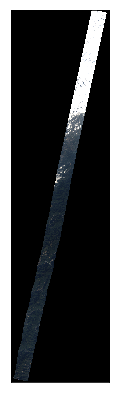

In [9]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(1.761, 8.051))
ep.plot_rgb(EO1_output_path,rgb=(28,19,11),ax=ax,str_clip=4,stretch=True)
fig.savefig('EO1_RGB.TIF',dpi=1000,pad_inches=0,bbox_inches='tight')


七、調整圖片的大小和原本的圖一樣（1761*8051）

In [10]:
from PIL import Image
img=Image.open('EO1_RGB.TIF')

In [11]:
img=img.resize((1761,8051),Image.ANTIALIAS)

In [12]:
img.save('EO1_RGB.TIF')

八、選取土壤區和樹木區的位置

In [13]:
soil_location = (521,5419)#土壤區

In [14]:
tree_location=(847,4343)#樹木區

九、利用迴圈將所有BAND中，土壤區和樹木區的值分別放入不同List，並且做圖

In [15]:
the_list_of_soil_location=[]
the_list_of_tree_location=[]
for i in range(0,50):
    the_list_of_soil_location.append(EO1_output_path[i][5419][521])
    the_list_of_tree_location.append(EO1_output_path[i][4343][847])

    

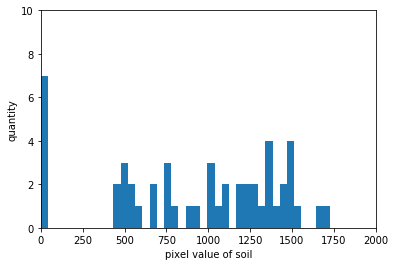

In [16]:
import matplotlib.pyplot as plt
plt.ylabel('quantity')
plt.xlabel('pixel value of soil')
plt.xlim(0,2000)
plt.ylim(0,10)
plt.hist(the_list_of_soil_location,bins=40)
plt.show()

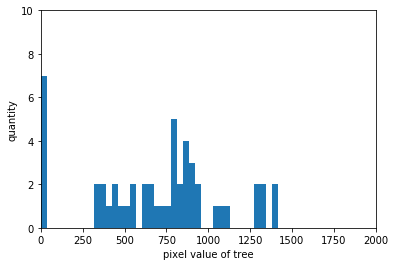

In [17]:
plt.ylabel('quantity')
plt.xlabel('pixel value of tree')
plt.xlim(0,2000)
plt.ylim(0,10)
plt.hist(the_list_of_tree_location,bins=40)
plt.show()

In [18]:
import sklearn.cluster 

In [19]:
R=EO1_output_path[28]
G=EO1_output_path[19]
B=EO1_output_path[11]

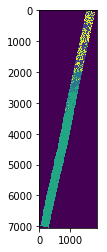

In [20]:
original_shape = R.shape # so we can reshape the labels later

samples = np.column_stack([R.flatten(), G.flatten(), B.flatten()])

clf = sklearn.cluster.KMeans(n_clusters=6)
labels = clf.fit_predict(samples).reshape(original_shape)

import matplotlib.pyplot as plt

plt.imshow(labels)
plt.imsave('sk_kmeans_classification.tif',labels)
plt.show()


In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [22]:
original_image = cv2.imread('EO1_RGB.TIF')

In [23]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)

In [24]:
vectorized = img.reshape((-1,3))
vectorized = np.float32(vectorized)

In [25]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [31]:
K = 6
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [32]:
center = np.uint8(center)

In [33]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))


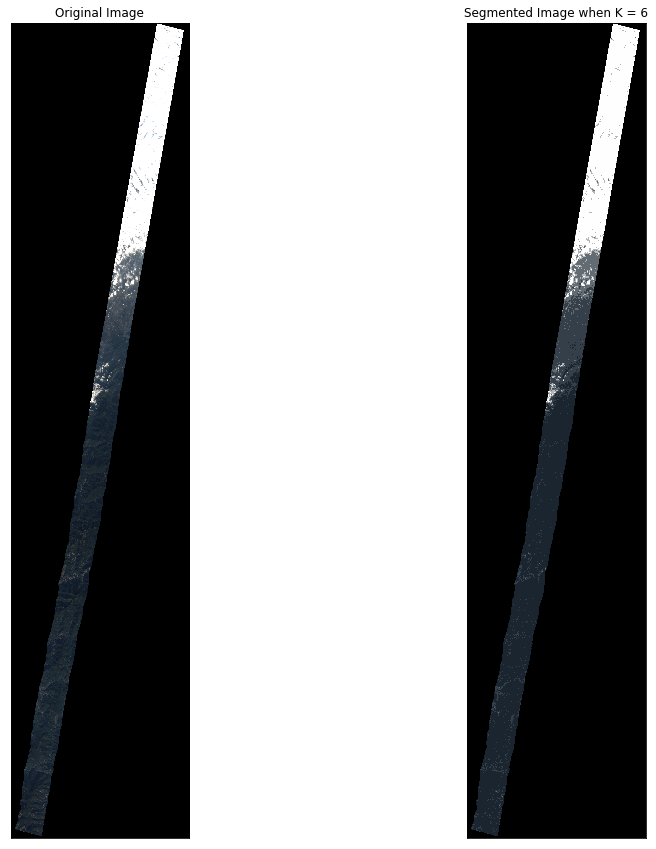

In [34]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()


In [30]:
plt.imsave('kmeans_classification.tif',result_image)